# Prueba Tecnica Roberto Israel Nava Rodríguez

# Importante
Para poder hacer funcionar el siguiente analis se requiere tener los archivos de datos en la misma carpeta que este notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#-------Importo los archivos csv y los convierto a dataframes
df_campaign=pd.read_csv('campaign_result.csv',index_col=(0))
df_countries=pd.read_csv('countries.csv', index_col=(0))
df_specialities=pd.read_csv('specialties.csv', index_col=(0))

#------Junto los dataframes de los resultados de la campaña con el de los paises y especialidades
campaign_country = pd.merge(left=df_campaign,right=df_countries, left_on='id_doctor', right_on='id_doctor')
campaign_spec = pd.merge(left=df_campaign, right=df_specialities,left_on='id_doctor', right_on='id_doctor')
all_data = pd.merge(left=campaign_country, right=df_specialities, left_on='id_doctor', right_on='id_doctor')

In [2]:
#-----Esta función hace un conteo de los estados activo e inactivo de la lista que se le asigne
def active (lst):
    act=0
    inact=0
    for i in lst:
        if i == 'active':
            act+=1
        else:
            inact+=1
    res=[act, inact]
    return res

# Preguntas
# Pregunta 1.
¿La campaña fue exitosa?

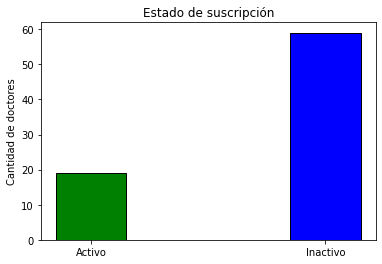

De los 78 doctores que entraron al programa de prueba, 19 están activos, y 59 están inactivos.
 Por lo tanto 24.36% continuo en el programa y 75.64% no continuó.


In [3]:
#-Se usa el dataframe df_campaign para realizar una grafica de barras comparativa entre los doctores activos e inactivos
bars = [1,2]

plt.bar(bars, active(df_campaign.state), width=0.3, align='center', color=["green", "blue"], edgecolor='black')
plt.xticks(bars, ["Activo", "Inactivo"])
plt.ylabel("Cantidad de doctores")
plt.title("Estado de suscripción")
plt.show()

#---Calculo de porcentajes
porc_act=((active(df_campaign.state)[0]/len(df_campaign)))
porc_inact=((active(df_campaign.state)[1]/len(df_campaign)))

print(f'De los {len(df_campaign)} doctores que entraron al programa de prueba, {active(df_campaign.state)[0]} están activos, y {active(df_campaign.state)[1]} están inactivos.\n Por lo tanto {porc_act :.2%} continuo en el programa y {porc_inact :.2%} no continuó.')

De estos resultados se podria considerar que el programa fue un exito en los tres primeros meses de lanzamiento, al lograr casi un 25% de retención, sin embargo, para un mejor análisis, se podrían recopilar los datos futuros y ver el numero de suscripciones nuevas y poder elaborar un cálculo predictivo segun la tendencia.

# Pregunta 2.
¿La especialidad médica del doctor influyó en el éxito de la compra?

                                  Especialidad  Activo  Inactivo
0                             Medicina General       2         5
1                               Terapia Física       1         0
2   Cirugía Plástica Reconstructiva y Estética       1         1
3                         Oncología Quirúrgica       1         0
4                 Administración de Hospitales       1         4
5              Cirugía General y Laparoscópica       1         0
6                    Ortopedia y Traumatología       2         1
7                                      Cirugía       0         2
8                                   Acupuntura       0         4
9                           Psicología Clínica       0         1
10                                    Urología       0         2
11                                   Pediatría       2         2
12                   Ginecología y Obstetricia       0         2
13                                  Psicología       0         1
14                       

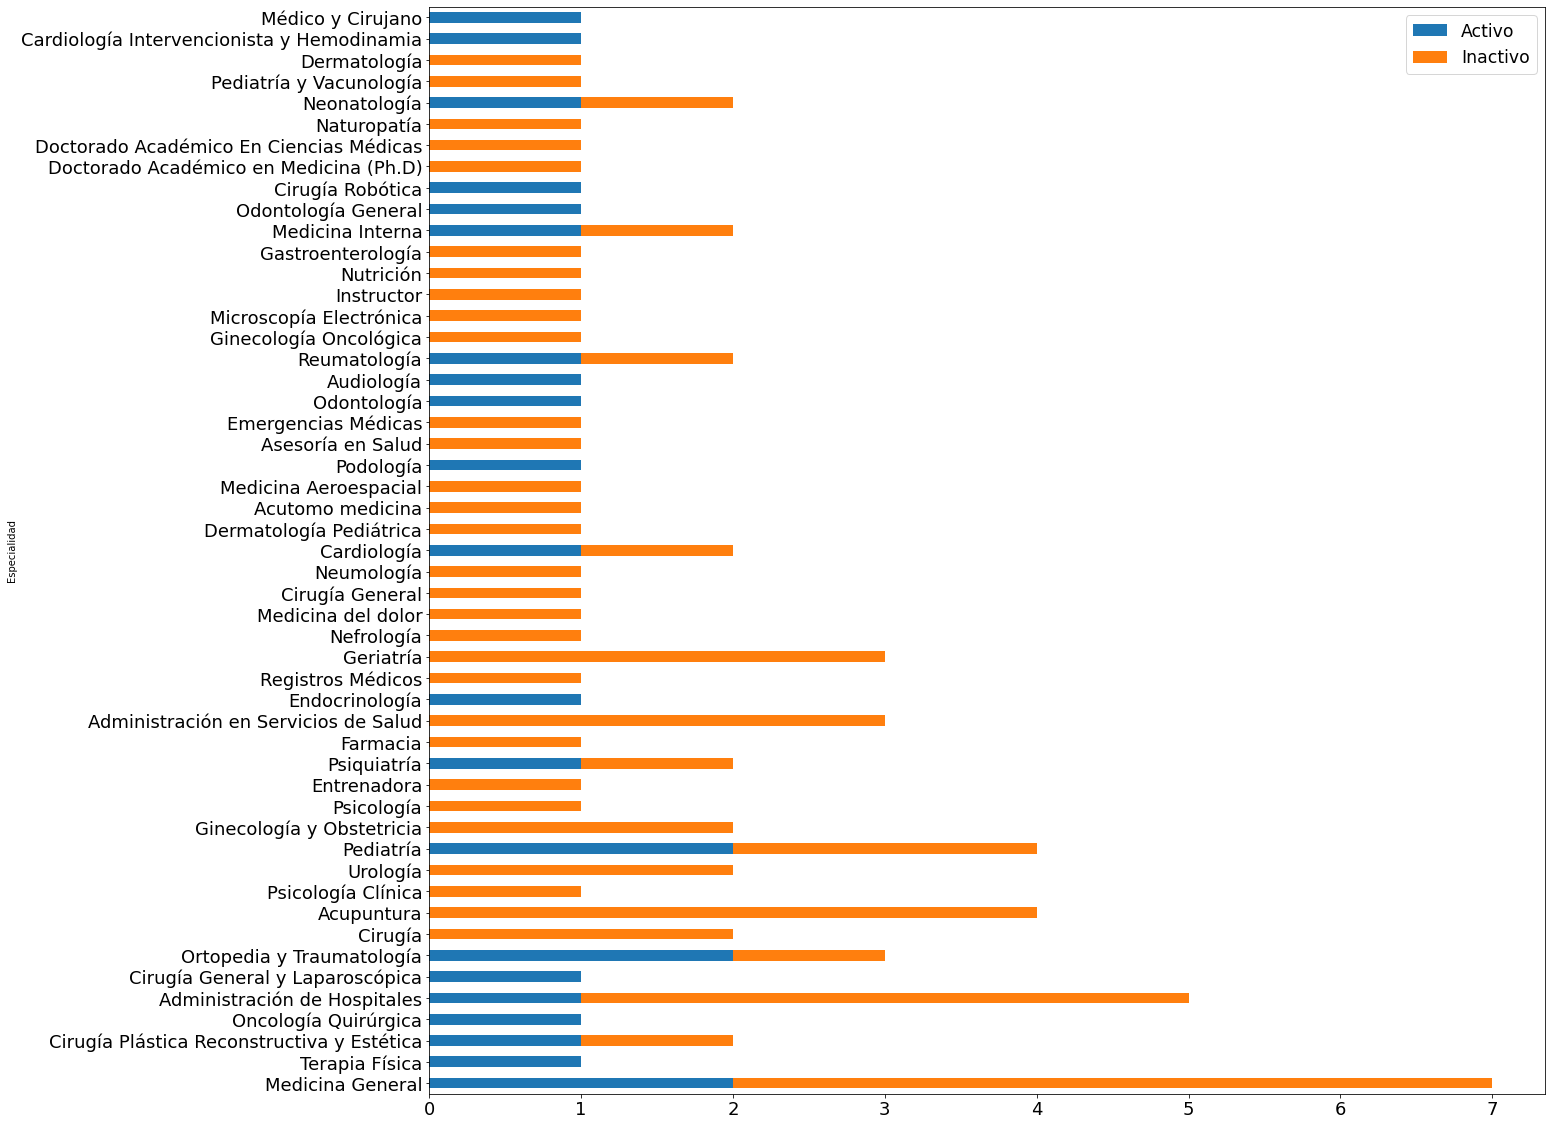

In [4]:
#--Se realiza una busqueda de cada especialidad unica en el dataframe
spec_dif=campaign_spec['specialty'].unique()

#--Se crea una lista con las especialidades distintas y el estado de la suscripción
spec_stat=[]
for j in spec_dif:
    status_lst = campaign_spec.state[(campaign_spec['specialty'] == j)].tolist()
    count_status = active(status_lst)
    count_status.insert(0, j)
    spec_stat.append(count_status)

#--Creamos un nuevo dataframe con la información de la lista anterior
df_spec_stat = pd.DataFrame(spec_stat,columns=['Especialidad','Activo','Inactivo'])
print(df_spec_stat[['Especialidad','Activo','Inactivo']])

#--Para observar las diferencias se realiza una grafica de barras de cada especialidad con estatus activo e inactivo
df_spec_stat.plot(x="Especialidad", y=["Activo", "Inactivo"], kind="barh",figsize=(20,20),stacked=True,fontsize=18)
plt.legend(fontsize='xx-large')
plt.show()

En esta gráfica se observa que si existe una tendencia para las especialidades que son más multidisiplinarias, por lo tanto requieren un historial médico más completo del paciente para poder tomar decisiones con menor margen de riesgo como la oncología, los cirujanos especializados o endocrinologia, por mencionar algunos.

Por otra parte, las especialidades de menor riesgo de verse afectadas por otros padecimientos muestran una tendencia a no continuar con la suscripción.

# Pregunta 3.
El país de procedencia del doctor influyó en el éxito de la compra?

                      ACTIVO  INACTIVO
País                                  
Panamá                     4         9
Costa Rica                12        16
Honduras                   2         8
República Dominicana       0        11
Guatemala                  1        14


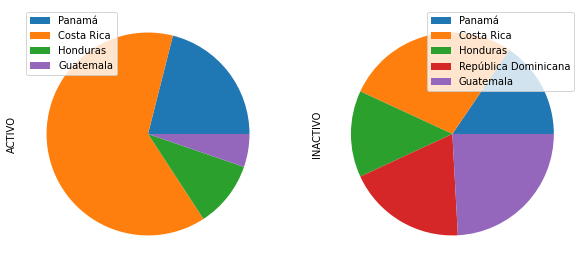

In [5]:
#--Se realiza una busqueda de los paises distintos en el dataframe
country_dif=campaign_country['country'].unique()

#--Elaboramos una lista de los paises y el estado de su suscripción
country_stat=[]
for j in country_dif:
    country_lst = campaign_country.state[(campaign_country['country'] == j)].tolist()
    country_status = active(country_lst)
    country_status.insert(0, j)
    country_stat.append(country_status)

#Creamos un nuevo dataframe con la lista anterior
df_country_stat = pd.DataFrame(country_stat,columns=['País','ACTIVO','INACTIVO'])
df_country_stat.set_index('País',inplace = True)
print(df_country_stat)

#--Para la visualización de los datos creamos dos graficas de pastel 
df_country_stat.plot.pie(subplots=True,figsize=(10, 10),legend=True,labeldistance=None, fontsize=25)
plt.show()

Estas dos graficas de pastel muestran, a la derecha, la proporción de los paises con suscripciones activas, y, a la izquierda, la proporción de los paises sin subscripción despues del periodo de prueba.

Con esta información se puede notar que para Costa Rica y Panamá hubo una mayor compra del servicio en comparación con los otros paises, en cambio, para Republica Dominicana y Guatemala, los doctores tuvieron la tendencia de no contratar despues del periodo de prueba.

Para Honduras es el tercer país con mas contrataciones, pero también el quinto con menos contrataciones. Si se observan los datos en la tabla sobre las graficas, se nota una tendencia mayor a no contratar con 8 doctres inactivos, que a si hacerlo, con 2 doctores que si contrataron.

Por lo tanto se puede concluir que el país de procedencia del doctor si influyó sobre la compra del servicio.